In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(url, sep = ',')

 - Resumo dos dados que estão no dataset .
  
   - cada linha representa um site que deveria ser criado.
   - colunas 
      - unfinished : se o projeto foi finalizado ou não , 
      - expected_hours : a quantidade de temppo provavel para a conclusao do projeto
      - price : preço a ser pago pelo trabalho

In [3]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


 - Objetivo :
  Utilizando os dados acima , iremos desenvolver um modelo que faça uma classificação se alguém irá aceitar desenvolver o projeto, baseado na quantidade de horas a ser trabalhadas e o preço a ser pago .

 - Tratando os dados.

In [4]:
#  renomeando as colunas .

new_names = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price' : 'preco'
}

dados = dados.rename(columns = new_names)

 - Criando a coluna finalizado.

In [5]:
troca = {
    0:1,
    1:0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)

In [6]:
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


 - Visualizando a distribuição dos dados

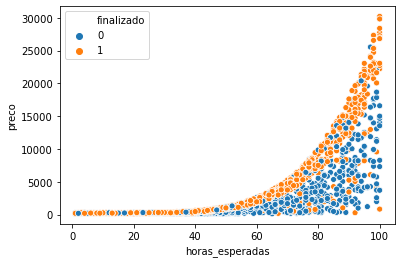

In [7]:
sns.scatterplot(x='horas_esperadas' , y = 'preco', hue = 'finalizado', data = dados)

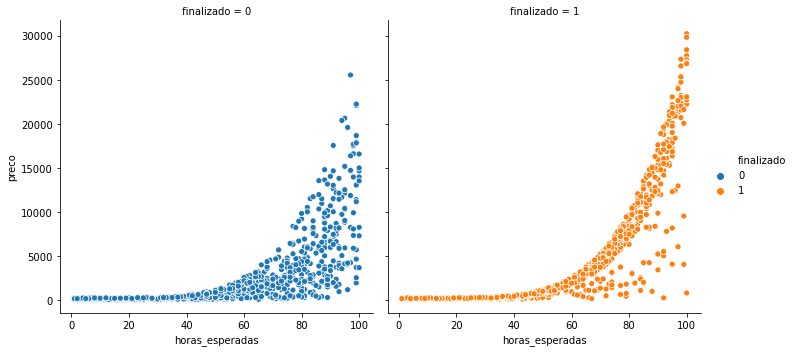

In [8]:
sns.relplot(x='horas_esperadas' , y = 'preco', hue = 'finalizado', col = 'finalizado', data = dados)

 - Machine learning 

 - Separando as amostras de treino e teste

In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

 - Separando as amostras de treino e teste e aplicando o algoritmo de machine learning 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

np.random.seed(2)
x_treino, x_teste , y_treino, y_teste = train_test_split(x, y, test_size = 0.25)
print( ' Treinamos com %d elementos e testamos com %d elementos' % (len(x_treino), len(x_teste)))

modelo = LinearSVC()
modelo.fit(x_treino, y_treino)
y_pred = modelo.predict(x_teste)

acuracia = accuracy_score(y_teste, y_pred) * 100
print('A acurácia foi %.2f%%' % acuracia)

 Treinamos com 1617 elementos e testamos com 540 elementos
A acurácia foi 54.81%


C:\Users\Biena\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


 - Comparando o algoritmo com a baseline

In [11]:
#  Criando uma linha de base 

previsoes_linha_de_base = np.ones(540)

acuracia = accuracy_score(y_teste, previsoes_linha_de_base) * 100
print('A acurácia do algoritmo de baseline foi %.2f%%' % acuracia)




A acurácia do algoritmo de baseline foi 52.59%


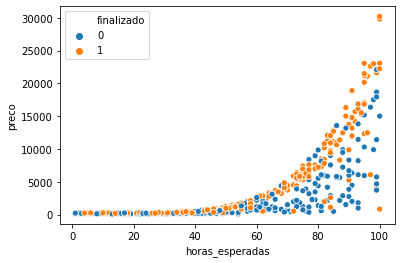

In [12]:
sns.scatterplot(x='horas_esperadas' , y = 'preco', hue = y_teste, data = x_teste)

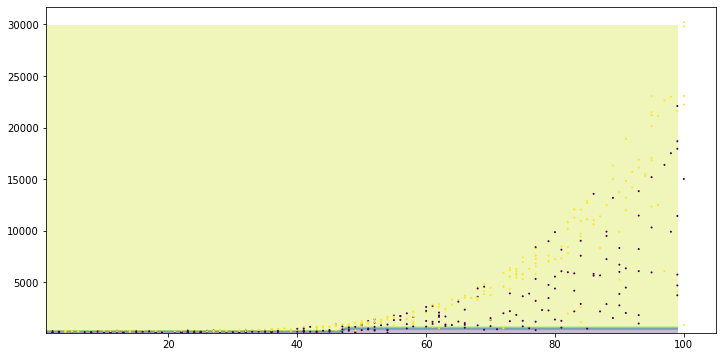

In [13]:
x_min = x_teste.horas_esperadas.min()
x_max = x_teste.horas_esperadas.max()
y_min = x_teste.preco.min()
y_max = x_teste.preco.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(12,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_teste.horas_esperadas, x_teste.preco, c= y_teste, s=1)
# DECISION BOUNDARY

Apesar da acuracia ser 65.93%, a curva de decisão se comportou como uma reta, praticamente chutou tudo 1, logo devemos achar outro algoritmo que tenha um coportamento e resultado melhor do que  LinearSVC.